# 0.0 Imports

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from dateutil.relativedelta import relativedelta
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, roc_curve, auc

## 0.1 Functions

In [48]:
def descriptive_statistics(num):
    # Central Tendency - mean, median

    ct1 = pd.DataFrame(num.apply(np.mean)).T
    ct2 = pd.DataFrame(num.apply(np.median)).T

    # Dispersion - std, min, max, range, skew, curtosis
    d1 = pd.DataFrame(num.apply(min)).T
    d2 = pd.DataFrame(num.apply(max)).T
    d3 = pd.DataFrame(num.apply(lambda x: x.max()-x.min())).T
    d4 = pd.DataFrame(num.apply(np.std)).T
    d5 = pd.DataFrame(num.apply(lambda x: x.skew())).T
    d6 = pd.DataFrame(num.apply(lambda x: x.kurtosis())).T

    ctd = pd.concat([ct1,ct2,d1,d2,d3,d4,d5,d6]).T.reset_index()
    ctd.columns = ['features', 'mean','median','min','max','range','std','skew','kurtosis']
    return ctd

## 0.2 Import Data

In [3]:
df = pd.read_csv('../data/fraud_test.csv', index_col = 0)

df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# 1.0 Data Description

In [4]:
df1 = df.copy()

## 1.1 Data Dimensions

In [5]:
print(f'O dataset possui {df1.shape[0]} linhas e {df1.shape[1]} colunas.')

O dataset possui 555719 linhas e 22 colunas.


## 1.2 Data Types

In [6]:
# Tipo de dados para cada variável
df1.dtypes

trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [7]:
# Quantas variávei de cada tipo
df1.dtypes.value_counts()

object     12
float64     6
int64       4
Name: count, dtype: int64

## 1.3 Null Values

In [8]:
# No NA values
df1.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

## 1.4 Data Balance

In [9]:
# Imbalance dataset
df1.is_fraud.value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

## 1.5 Descriptive Statistics

In [10]:
# Estatísticas descritivas das Transações Legítimas
display(descriptive_statistics(df1.loc[df1.is_fraud == 0][['amt']]))

# Estatísticas descritivas das Transações Fraudulentas
display(descriptive_statistics(df1.loc[df1.is_fraud == 1][['amt']]))

,features,mean,median,min,max,range,std,skew,kurtosis
0,amt,67.614408,47.15,1.0,22768.11,22767.11,152.471793,40.196261,3641.057641


,features,mean,median,min,max,range,std,skew,kurtosis
0,amt,528.356494,371.94,1.78,1320.92,1319.14,392.656034,0.037961,-1.526826


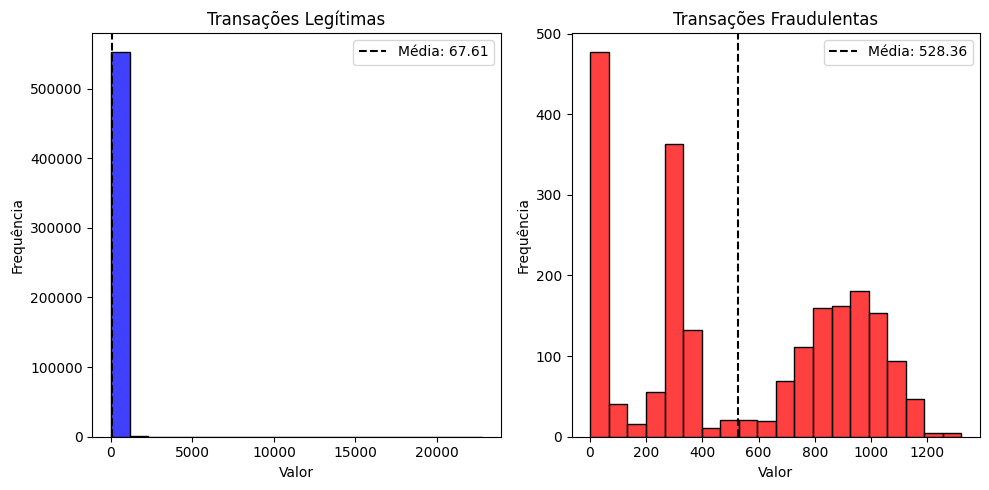

In [11]:
# Crie uma figura e eixos com 1 linha e 2 colunas
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plotar o primeiro histograma (Transações Legítimas)
sns.histplot(data=df1.loc[df1.is_fraud == 0], x='amt', bins=20, color='blue', ax=axes[0])
axes[0].axvline(x=df1.loc[df1.is_fraud == 0, 'amt'].mean(), color='black', linestyle='--', label=f'Média: {df1.loc[df1.is_fraud == 0, 'amt'].mean():.2f}')
axes[0].set_title('Transações Legítimas')
axes[0].set_xlabel('Valor')
axes[0].set_ylabel('Frequência')
axes[0].legend()

# Plotar o segundo histograma (Transações Fraudulentas)
sns.histplot(data=df1.loc[df1.is_fraud == 1], x='amt', bins=20, color='red', ax=axes[1])
axes[1].axvline(x=df1.loc[df1.is_fraud == 1, 'amt'].mean(), color='black', linestyle='--', label=f'Média: {df1.loc[df1.is_fraud == 1, 'amt'].mean():.2f}')
axes[1].set_title('Transações Fraudulentas')
axes[1].set_xlabel('Valor')
axes[1].set_ylabel('Frequência')
axes[1].legend()


# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

# 2.0 Data Cleaning

In [12]:
df2 = df1.copy()
# Exibir todas as colunas
pd.set_option('display.max_columns', None)

## 2.1. Change Data Type

In [13]:
# Converting to Datetime

# CRIAR FUNÇÃO
df2.trans_date_trans_time = pd.to_datetime(df2.trans_date_trans_time, dayfirst=True)
df2.dob = pd.to_datetime(df2.dob, dayfirst=True)
df2.unix_time = pd.to_datetime(df2.unix_time, unit = 's')

# 3.0 Feature Engineering

In [14]:
df3 = df2.copy()

In [15]:
# Variável de Idade
df3['age'] = df3['dob'].apply(lambda x: relativedelta(datetime.now(), x).years)

# Variáveis de Tempo
df3['month'] = df3.trans_date_trans_time.dt.month
df3['day'] = df3.trans_date_trans_time.dt.day
df3['weekday'] = df3.trans_date_trans_time.dt.weekday
df3['hour'] = df3.trans_date_trans_time.dt.hour
df3['minute'] = df3.trans_date_trans_time.dt.minute

In [16]:
# CRIAR FUNÇÃO

# Criando um df com as Cidades e suas maiores Populações encontradas
# No datafram originais, a mesma cidade aparece com populações diferetes 
cidades = df3.groupby('city')['city_pop'].max().reset_index()
city_fraud = df3.groupby('city')['is_fraud'].sum()
cidades = pd.merge(cidades, city_fraud, on = 'city')
cidades['fraud_per_pop'] = cidades.is_fraud / cidades.city_pop
cidades

,city,city_pop,is_fraud,fraud_per_pop
0,Achille,608,0,0.000000
1,Acworth,477,0,0.000000
2,Adams,3508,12,0.003421
3,Afton,2916,7,0.002401
4,Akron,272134,9,0.000033
...,...,...,...,...
844,Woods Cross,13983,0,0.000000
845,Woodville,3395,10,0.002946
846,Yellowstone National Park,369,0,0.000000
847,Zaleski,341,0,0.000000


In [17]:
# CRIAR FUNÇÕES

# JOIN DAS CIDADES COM A BASE DE TRANSAÇÕES
df3['city_pop'] = df3.apply(lambda x: cidades.loc[cidades['city'] == x['city'], 'city_pop'].values[0] if x['city'] in cidades['city'].values else x['city_pop'], axis=1)

# Join para pegar a proporção de frauders por habitante
df3 = pd.merge(df3, cidades[['city', 'fraud_per_pop']], on = 'city')

In [18]:
df3.trans_date_trans_time
# category
# amt
# gender
# lat
# long
#city_pop
# job (???)
# merch_lat
# merch_long
# age
# month
# day	weekday	hour	minute	fraud_per_pop

0        2020-06-21 12:14:00
1        2020-06-21 12:14:00
2        2020-06-21 12:14:00
3        2020-06-21 12:15:00
4        2020-06-21 12:15:00
                 ...        
555714   2020-12-31 23:59:00
555715   2020-12-31 23:59:00
555716   2020-12-31 23:59:00
555717   2020-12-31 23:59:00
555718   2020-12-31 23:59:00
Name: trans_date_trans_time, Length: 555719, dtype: datetime64[ns]

# 4.0 EDA - Exploratory Data Analysis

In [19]:
df4 = df3.copy()

# 5.0 Feature Selection

In [20]:
df5 = df4.copy()

In [21]:
## TESTE DE SIGNIFICANCIA
selecao = ['category', 'amt', 'gender', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age', 'month','day','weekday','hour','minute','fraud_per_pop', 'is_fraud']

df5 = df5[selecao]

df5.head()


,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,age,month,day,weekday,hour,minute,fraud_per_pop,is_fraud
0,personal_care,2.86,M,33.9659,-80.9355,333497,33.986391,-81.200714,56,6,21,6,12,14,0.000000,0
1,personal_care,29.84,F,40.3207,-110.4360,302,39.450498,-109.960431,34,6,21,6,12,14,0.000000,0
2,health_fitness,41.28,F,40.6729,-73.5365,34496,40.495810,-74.196111,53,6,21,6,12,14,0.000000,0
3,misc_pos,60.05,M,28.5697,-80.8191,54767,28.812398,-80.883061,36,6,21,6,12,15,0.000183,0
4,travel,3.19,M,44.2529,-85.0170,1126,44.959148,-85.884734,68,6,21,6,12,15,0.000000,0


# 6. Data Preparation

In [22]:
df6 = df5.copy()

X = df6.drop('is_fraud', axis=1).copy()
y = df6['is_fraud']

# 6.1 Encoding

In [23]:
# Binarization
X['gender'] = X.apply(lambda x: 1 if x['gender'] == 'M' else 2, axis= 1)

# Encoding
X = pd.get_dummies(X)

## Data Balacing - Unsersampling

In [24]:
from imblearn.under_sampling import RandomUnderSampler

# Criar uma instância de RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Tamanho do Dataset
print('Tamanho do Dataset:', y.shape[0])
print('Tamanho de 0:', y.value_counts()[0])
print('Tamanho de 1:', y.value_counts()[1])

# Aplicar undersampling aos dados
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Tamanho do Dataset
print('Tamanho do Dataset Resampled:', y_resampled.shape[0])
print('Tamanho de 0:', y_resampled.value_counts()[0])
print('Tamanho de 1:', y_resampled.value_counts()[1])

Tamanho do Dataset: 555719
Tamanho de 0: 553574
Tamanho de 1: 2145
Tamanho do Dataset Resampled: 4290
Tamanho de 0: 2145
Tamanho de 1: 2145


## 6.2 Train Test Split

In [25]:
X_train, X_test, y_train, y_test =  train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state= 42)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (3432, 28)
y_train (3432,)
X_test (858, 28)
y_test (858,)


## 6.3 Normalization

In [26]:
# Normalization Definition 
ss = StandardScaler()
X_train[['amt', 'lat', 'long', 'city_pop','age', 'month', 'day', 'weekday', 'hour', 'minute']] = ss.fit_transform(X = X_train[['amt', 'lat', 'long', 'city_pop','age', 'month', 'day', 'weekday', 'hour', 'minute']])
X_test[['amt', 'lat', 'long', 'city_pop','age', 'month', 'day', 'weekday', 'hour', 'minute']] = ss.fit_transform(X = X_test[['amt', 'lat', 'long', 'city_pop','age', 'month', 'day', 'weekday', 'hour', 'minute']])


# 7.0 Machine Learning Modelling

In [27]:
from sklearn.linear_model import LogisticRegression
from  sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [28]:
def overfitting_eval(train_scores, test_scores, threshold ):
    for i, (train_score, test_score) in enumerate(zip(train_scores, test_scores)):
        if (train_score - test_score) >= threshold:
            print(f"Fold {i+1}: Potencial overfitting: pontuação de treinamento superior ({train_score.round(2)}) à pontuação de teste ({test_score.round(2)}), num threshold de {threshold}.")
        else:
            print(f"Fold {i+1}: No sign of overfitting")

## 7.1 K-NN Classifier

In [29]:
# Model Definition
knn = KNeighborsClassifier()
# Cross-Validation
knn_cv = cross_validate(knn, X_resampled, y_resampled, scoring='f1', cv= 10, return_train_score = True)
# Overfitting evaluation
overfitting_eval(knn_cv['train_score'] , knn_cv['test_score'], 0.2)
# Model training
knn.fit(X_resampled, y_resampled)
# Model prediction
y_hat = knn.predict(X_resampled)
# Model performance
print('F1-score:', f1_score(y_resampled, y_hat))

Fold 1: Potencial overfitting: pontuação de treinamento superior (0.92) à pontuação de teste (0.58), num threshold de 0.2.
Fold 2: Potencial overfitting: pontuação de treinamento superior (0.92) à pontuação de teste (0.71), num threshold de 0.2.
Fold 3: Potencial overfitting: pontuação de treinamento superior (0.92) à pontuação de teste (0.7), num threshold de 0.2.
Fold 4: No sign of overfitting
Fold 5: No sign of overfitting
Fold 6: Potencial overfitting: pontuação de treinamento superior (0.92) à pontuação de teste (0.64), num threshold de 0.2.
Fold 7: No sign of overfitting
Fold 8: No sign of overfitting
Fold 9: No sign of overfitting
Fold 10: No sign of overfitting
F1-score: 0.9170912459471978


## 7.2 Random Forest Classifier

In [30]:
# Model Definition
rfc = RandomForestClassifier(random_state = 42)
# Cross-Validation
rfc_cv = cross_validate(rfc, X_resampled, y_resampled, scoring='f1', cv= 10, return_train_score = True)
# Overfitting Evaluation
overfitting_eval(rfc_cv['train_score'] , rfc_cv['test_score'], 0.2)
# Model training
rfc.fit(X_resampled, y_resampled)
# Model prediction
y_hat = rfc.predict(X_resampled)
# Model performance
print('F1-score:', f1_score(y_resampled, y_hat))

Fold 1: No sign of overfitting
Fold 2: No sign of overfitting
Fold 3: No sign of overfitting
Fold 4: No sign of overfitting
Fold 5: No sign of overfitting
Fold 6: No sign of overfitting
Fold 7: No sign of overfitting
Fold 8: No sign of overfitting
Fold 9: No sign of overfitting
Fold 10: No sign of overfitting
F1-score: 1.0


## 7.3 XGBoost Classifier

In [31]:
# Model Definition
xgb = GradientBoostingClassifier(random_state = 42)
# Cross-Validation
xgb_cv = cross_validate(xgb, X_resampled, y_resampled, scoring='f1', cv= 10, return_train_score = True)
# Overfitting Evaluation
overfitting_eval(xgb_cv['train_score'] , xgb_cv['test_score'], 0.2)
# Model training
xgb.fit(X_resampled, y_resampled)
# Model prediction
y_hat = xgb.predict(X_resampled)
# Model performance
print('F1-score:', f1_score(y_resampled, y_hat))

Fold 1: No sign of overfitting
Fold 2: No sign of overfitting
Fold 3: No sign of overfitting
Fold 4: No sign of overfitting
Fold 5: No sign of overfitting
Fold 6: No sign of overfitting
Fold 7: No sign of overfitting
Fold 8: No sign of overfitting
Fold 9: No sign of overfitting
Fold 10: No sign of overfitting
F1-score: 0.9881422924901185


# 8.0 Class and Functions

In [32]:
# Fraud_Detection
    # Data Description
    # Descriptive Statistics
        # Descriptive Statistics Target
    # Preprocess
        # Converting Data Types
        # Feature Engineering
            # Time Variables
            # City population variables
        # Feature Selection
        # Data Preparation
            # Encoding
            # Data Balacing
                # Undersampling
                # Oversampling
            # Train Test Split
            # Normalization
    # Machine Learning Modeling
        # Model Definition
        # Cross Validation
        # Overfitting Evaluation
        # Model Training
        # Model Prediction
        # Model Performance
        # Perfomance Visualization

In [88]:
class Fraud_Detection:
    def __init__(self):
        self.data_raw = None
        self.data_preprocessed = None
        self.X = None
        self.y = None
        self.y_predict = None
        self.classes = ['Legítimas', 'Fraudulentas']
    
    def load_dataset(self, dataset_path:str) -> None:
        self.data_raw = pd.read_csv(dataset_path, index_col = 0)
    
    def data_description(self):
        df1 = self.data_raw
        # Mensagem descrevendo os tipos de variáveis e suas quantidades
        mensagem = f'O dataset possui {df1.shape[0]} linhas e {df1.shape[1]} colunas.\n'
        mensagem += "O dataset possui as seguintes variáveis:\n"
        for tipo, quantidade in df1.dtypes.value_counts().items():
            mensagem += f"- {quantidade} variáveis do tipo '{tipo}'\n"
        mensagem += f'O dataset possui o total de {df1.isnull().sum().sum()} valores nulos.\n'
        mensagem += f"O dataset possui o seguinte balanceanento:\n- Transações Legítimas: {df1.is_fraud.value_counts()[0]}\n- Transações Fraudelentas: {df1.is_fraud.value_counts()[1]}"
        print(mensagem)
    
    def descriptive_statistics(self, num:list) -> pd.DataFrame:
        # Central Tendency - mean, median
        ct1 = pd.DataFrame(num.apply(np.mean)).T
        ct2 = pd.DataFrame(num.apply(np.median)).T
        # Dispersion - std, min, max, range, skew, curtosis
        d1 = pd.DataFrame(num.apply(min)).T
        d2 = pd.DataFrame(num.apply(max)).T
        d3 = pd.DataFrame(num.apply(lambda x: x.max()-x.min())).T
        d4 = pd.DataFrame(num.apply(np.std)).T
        d5 = pd.DataFrame(num.apply(lambda x: x.skew())).T
        d6 = pd.DataFrame(num.apply(lambda x: x.kurtosis())).T
        ctd = pd.concat([ct1,ct2,d1,d2,d3,d4,d5,d6]).T.reset_index()
        ctd.columns = ['features', 'mean','median','min','max','range','std','skew','kurtosis']
        return ctd

    def descriptive_statistics_target(self) -> None:
        df1 = self.data_raw
        ds = pd.concat([descriptive_statistics(df1.loc[df1.is_fraud == 0][['amt']]),
                        descriptive_statistics(df1.loc[df1.is_fraud == 1][['amt']])])
        ds['transacao'] = ['Legítimas', 'Fraudulentas']
        display(ds)
        # Crie uma figura e eixos com 1 linha e 2 colunas
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        # Plotar o primeiro histograma (Transações Legítimas)
        sns.histplot(data=df1.loc[df1.is_fraud == 0], x='amt', bins=20, color='blue', ax=axes[0])
        axes[0].axvline(x=df1.loc[df1.is_fraud == 0, 'amt'].mean(), color='black', linestyle='--', label=f'Média: {df1.loc[df1.is_fraud == 0, 'amt'].mean():.2f}')
        axes[0].set_title('Transações Legítimas')
        axes[0].set_xlabel('Valor')
        axes[0].set_ylabel('Frequência')
        axes[0].legend()
        # Plotar o segundo histograma (Transações Fraudulentas)
        sns.histplot(data=df1.loc[df1.is_fraud == 1], x='amt', bins=20, color='red', ax=axes[1])
        axes[1].axvline(x=df1.loc[df1.is_fraud == 1, 'amt'].mean(), color='black', linestyle='--', label=f'Média: {df1.loc[df1.is_fraud == 1, 'amt'].mean():.2f}')
        axes[1].set_title('Transações Fraudulentas')
        axes[1].set_xlabel('Valor')
        axes[1].set_ylabel('Frequência')
        axes[1].legend()
        # Ajustar layout
        plt.tight_layout()
        # Mostrar o gráfico
        plt.show()
    
    def change_data_type(self) -> None:
        df2 = self.data_raw
        df2.trans_date_trans_time = pd.to_datetime(df2.trans_date_trans_time, dayfirst=True)
        df2.dob = pd.to_datetime(df2.dob, dayfirst=True)
        df2.unix_time = pd.to_datetime(df2.unix_time, unit = 's')
        self.data_preprocessed = df2

    def feature_engineering(self) -> None:
        df3 = self.data_preprocessed
        # Variável de Idade
        df3['age'] = df3['dob'].apply(lambda x: relativedelta(datetime.now(), x).years)
        print('     >> Age feature')
        # Variáveis de Tempo
        df3['month'] = df3.trans_date_trans_time.dt.month
        df3['day'] = df3.trans_date_trans_time.dt.day
        df3['weekday'] = df3.trans_date_trans_time.dt.weekday
        df3['hour'] = df3.trans_date_trans_time.dt.hour
        df3['minute'] = df3.trans_date_trans_time.dt.minute
        print('     >> Time features')

        # Criando um df com as Cidades e suas maiores Populações encontradas
        # No datafram originais, a mesma cidade aparece com populações diferetes 
        cidades = df3.groupby('city')['city_pop'].max().reset_index()
        city_fraud = df3.groupby('city')['is_fraud'].sum()
        cidades = pd.merge(cidades, city_fraud, on = 'city')
        cidades['fraud_per_pop'] = cidades.is_fraud / cidades.city_pop
        print('     >> Fraud per City Habitant feature')

        # JOIN DAS CIDADES COM A BASE DE TRANSAÇÕES
        df3['city_pop'] = df3.apply(lambda x: cidades.loc[cidades['city'] == x['city'], 'city_pop'].values[0] if x['city'] in cidades['city'].values else x['city_pop'], axis=1)

        # Join para pegar a proporção de frauders por habitante
        df3 = pd.merge(df3, cidades[['city', 'fraud_per_pop']], on = 'city')

        self.data_preprocessed = df3

    def feature_selection(self) -> None:
        df5 = self.data_preprocessed
        selecao = ['category', 'amt', 'gender', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age', 'month','day','weekday','hour','minute','fraud_per_pop', 'is_fraud']
        df5 = df5[selecao]
        self.data_preprocessed = df5

    def data_preparation(self) -> None:
        df6 = self.data_preprocessed
        X = df6.drop('is_fraud', axis=1).copy()
        y = df6['is_fraud']

        # Binarization
        X['gender'] = X.apply(lambda x: 1 if x['gender'] == 'M' else 2, axis= 1)
        # Encoding
        X = pd.get_dummies(X)
        print("     >> Encoding: DONE")
        # Criar uma instância de RandomUnderSampler
        undersampler = RandomUnderSampler(random_state=42)
        # Aplicar undersampling aos dados
        X_resampled, y_resampled = undersampler.fit_resample(X, y)
        print("     >> Data Balancing: DONE")
        # Normalization
        ss = StandardScaler()
        X_resampled[['amt', 'lat', 'long', 'city_pop','age', 'month', 'day', 'weekday', 'hour', 'minute']] = ss.fit_transform(X = X_resampled[['amt', 'lat', 'long', 'city_pop','age', 'month', 'day', 'weekday', 'hour', 'minute']])
        print("     >> Normalization: DONE")
        self.X, self.y = X_resampled, y_resampled 
    
    def pre_processing(self) -> None:
        print(">> Data types changes: ...")
        self.change_data_type()
        print(">> Data types changes: DONE")
        print(">> Feature Engineeging: ...")
        self.feature_engineering()
        print(">> Feature Engineeging: DONE")
        print(">> Feature Selection: ...")
        self.feature_selection()
        print(">> Feature Selection: DONE")
        print(">> Data Preparation: ...")
        self.data_preparation()
        print(">> Data Preparation: DONE")
        return None 
    
    def overfitting_eval(train_scores, test_scores, threshold):
        for i, (train_score, test_score) in enumerate(zip(train_scores, test_scores)):
            if (train_score - test_score) >= threshold:
                print(f"Fold {i+1}: Potencial overfitting: pontuação de treinamento superior ({train_score.round(2)}) à pontuação de teste ({test_score.round(2)}), num threshold de {threshold}.")
            else:
                print(f"Fold {i+1}: No sign of overfitting")
    def plot_cv_performance(self, scores, num_folds):
        test_scores = scores['test_score']
        # Plotar os resultados da validação cruzada
        plt.figure(figsize=(5, 3))
        plt.plot(np.arange(1, num_folds + 1), test_scores, marker='o', linestyle='-')
        plt.xlabel('Fold')
        plt.ylabel('F1-Score')
        plt.title('Cross-Validation Performance')
        plt.grid(True)
        plt.show()
    
    def cross_validation_report(self, model:str, folds:int, threshold:float) -> None:
        X_resampled = self.X
        y_resampled = self.y
        
        if model == 'knn':
            # Model Definition
            knn = KNeighborsClassifier()
            # Cross-Validation
            knn_cv = cross_validate(knn, X_resampled, y_resampled, scoring='f1', cv= folds, return_train_score = True)
            # Overfitting evaluation
            overfitting_eval(knn_cv['train_score'] , knn_cv['test_score'], threshold)
            # Plot CV Performance
            self.plot_cv_performance(knn_cv, folds)
            # Model training
            knn.fit(X_resampled, y_resampled)
            # Model prediction
            y_hat = knn.predict(X_resampled)
            # Saving y-hat to classe attribute
            self.y_predict = y_hat
            # Collect hyperparameters
            hiperparametros = pd.DataFrame({
                'model': 'KNeighborsClassifier', 
                'n_neighbors': knn.n_neighbors,
                'weights': knn.weights,
                'algorithm': knn.algorithm,
                'final_f1_score': f1_score(y_resampled, y_hat).round(3)
            }, index = [0])
            # Exibir o DataFrame
            display(hiperparametros)

        if model == 'rfc':
            rfc = RandomForestClassifier(random_state = 42)
            # Cross-Validation
            rfc_cv = cross_validate(rfc, X_resampled, y_resampled, scoring='f1', cv= 10, return_train_score = True)
            # Overfitting Evaluation
            overfitting_eval(rfc_cv['train_score'] , rfc_cv['test_score'], threshold)
            # Plot CV Performance
            self.plot_cv_performance(rfc_cv, folds)
            # Model training
            rfc.fit(X_resampled, y_resampled)
            # Model prediction
            y_hat = rfc.predict(X_resampled)
            # Saving y-hat to classe attribute
            self.y_predict = y_hat
            # Collect hyperparameters
            hiperparametros = pd.DataFrame({
                'model': 'RandomForestClassifier', 
                'n_estimators': rfc.n_estimators,
                'criterion': rfc.criterion,
                'max_depth': rfc.max_depth,
                'final_f1_score': f1_score(y_resampled, y_hat).round(3)
            }, index = [0])
            # Exibir o DataFrame
            display(hiperparametros)
        
        if model == 'gbc':
            # Model Definition
            gbc = GradientBoostingClassifier(random_state = 42)
            # Cross-Validation
            gbc_cv = cross_validate(xgb, X_resampled, y_resampled, scoring='f1', cv= 10, return_train_score = True)
            # Overfitting Evaluation
            overfitting_eval(gbc_cv['train_score'] , gbc_cv['test_score'], threshold)
            # Plot CV Performance
            self.plot_cv_performance(gbc_cv, folds)
            # Model training
            gbc.fit(X_resampled, y_resampled)
            # Model prediction
            y_hat = gbc.predict(X_resampled)
            # Saving y-hat to classe attribute
            self.y_predict = y_hat
            # Collect hyperparameters
            hiperparametros = pd.DataFrame({
                'model': 'GradientBoostingClassifier', 
                'n_estimators': gbc.n_estimators,
                'learning_rate': gbc.learning_rate,
                'max_depth': gbc.max_depth,
                'final_f1_score': f1_score(y_resampled, y_hat).round(3)
            }, index = [0])
            # Exibir o DataFrame
            display(hiperparametros)

        if model not in ['knn', 'rfc', 'gbc']:
            print("Please, use a valid model.")
    
    def plot_classification_viz(self, normalize=False):
        """
        Função para plotar a curva ROC e a matriz de confusão lado a lado.

        Parâmetros:
        - classes: lista de nomes das classes.
        - normalize: se True, a matriz de confusão será normalizada.
        """
        # Calcula a taxa de verdadeiros positivos (TPR) e taxa de falsos positivos (FPR)
        fpr, tpr, thresholds = roc_curve(self.y, self.y_predict)
        # Calcula a área sob a curva ROC (AUC-ROC)
        roc_auc = auc(fpr, tpr)

        # Calcula a matriz de confusão
        cm = confusion_matrix(self.y, self.y_predict)
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        # Plota a curva ROC e a matriz de confusão lado a lado
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        # Plota a curva ROC
        axes[0].plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
        axes[0].plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
        axes[0].set_xlim([0.0, 1.0])
        axes[0].set_ylim([0.0, 1.05])
        axes[0].set_xlabel('False Positive Rate')
        axes[0].set_ylabel('True Positive Rate')
        axes[0].set_title('Receiver Operating Characteristic (ROC) Curve')
        axes[0].legend(loc="lower right")

        # Plota a matriz de confusão
        im = axes[1].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        axes[1].figure.colorbar(im, ax=axes[1])
        axes[1].set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),
                    xticklabels=self.classes, yticklabels=self.classes,
                    title='Matriz de Confusão Normalizada' if normalize else 'Matriz de Confusão',
                    ylabel='Rótulo verdadeiro',
                    xlabel='Rótulo previsto')
        plt.setp(axes[1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                axes[1].text(j, i, format(cm[i, j], fmt),
                             ha="center", va="center",
                             color="white" if cm[i, j] > thresh else "black")
        fig.tight_layout()

        plt.show()


O dataset possui 555719 linhas e 22 colunas.
O dataset possui as seguintes variáveis:
- 12 variáveis do tipo 'object'
- 6 variáveis do tipo 'float64'
- 4 variáveis do tipo 'int64'
O dataset possui o total de 0 valores nulos.
O dataset possui o seguinte balanceanento:
- Transações Legítimas: 553574
- Transações Fraudelentas: 2145


,features,mean,median,min,max,range,std,skew,kurtosis,transacao
0,amt,67.614408,47.15,1.00,22768.11,22767.11,152.471793,40.196261,3641.057641,Legítimas
0,amt,528.356494,371.94,1.78,1320.92,1319.14,392.656034,0.037961,-1.526826,Fraudulentas


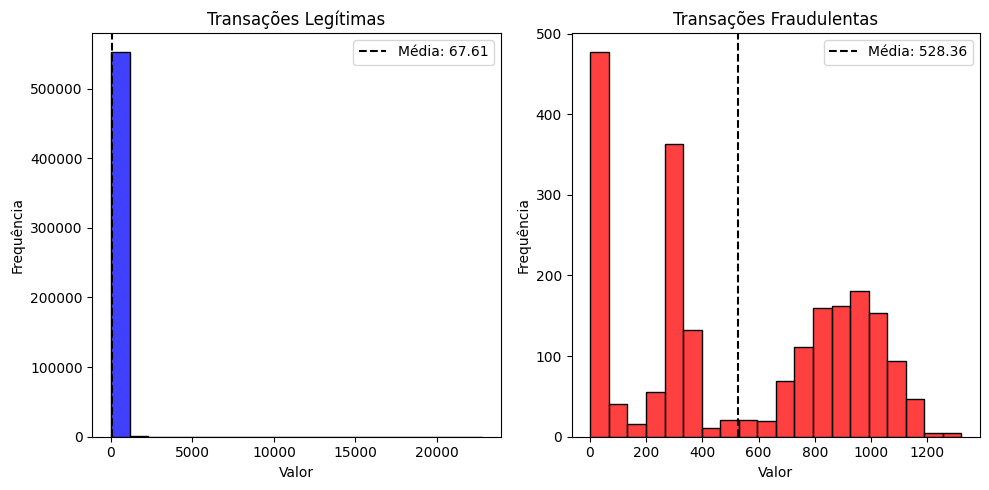

In [89]:
fraud = Fraud_Detection()
fraud.load_dataset('../data/fraud_test.csv')
fraud.data_description()
fraud.descriptive_statistics_target()

In [90]:
fraud.pre_processing()

>> Data types changes: ...
>> Data types changes: DONE
>> Feature Engineeging: ...
     >> Age feature
     >> Time features
     >> Fraud per City Habitant feature
>> Feature Engineeging: DONE
>> Feature Selection: ...
>> Feature Selection: DONE
>> Data Preparation: ...
     >> Encoding: DONE
     >> Data Balancing: DONE
     >> Normalization: DONE
>> Data Preparation: DONE


Fold 1: Potencial overfitting: pontuação de treinamento superior (0.92) à pontuação de teste (0.56), num threshold de 0.2.
Fold 2: Potencial overfitting: pontuação de treinamento superior (0.92) à pontuação de teste (0.69), num threshold de 0.2.
Fold 3: Potencial overfitting: pontuação de treinamento superior (0.92) à pontuação de teste (0.63), num threshold de 0.2.
Fold 4: Potencial overfitting: pontuação de treinamento superior (0.93) à pontuação de teste (0.72), num threshold de 0.2.
Fold 5: No sign of overfitting
Fold 6: Potencial overfitting: pontuação de treinamento superior (0.92) à pontuação de teste (0.63), num threshold de 0.2.
Fold 7: Potencial overfitting: pontuação de treinamento superior (0.93) à pontuação de teste (0.63), num threshold de 0.2.
Fold 8: No sign of overfitting
Fold 9: Potencial overfitting: pontuação de treinamento superior (0.92) à pontuação de teste (0.67), num threshold de 0.2.
Fold 10: Potencial overfitting: pontuação de treinamento superior (0.92) à po

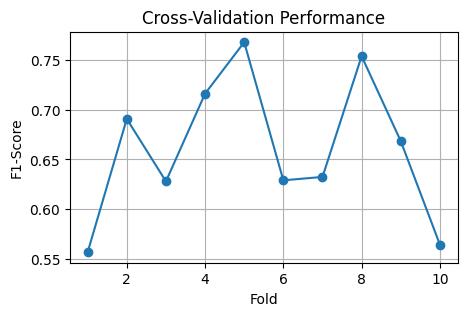

,model,n_neighbors,weights,algorithm,final_f1_score
0,KNeighborsClassifier,5,uniform,auto,0.922


Please, use a valid model.


In [54]:
fraud.cross_validation_report(model = 'knn', folds = 10, threshold = 0.2)

Fold 1: No sign of overfitting
Fold 2: No sign of overfitting
Fold 3: No sign of overfitting
Fold 4: No sign of overfitting
Fold 5: No sign of overfitting
Fold 6: No sign of overfitting
Fold 7: No sign of overfitting
Fold 8: No sign of overfitting
Fold 9: No sign of overfitting
Fold 10: No sign of overfitting


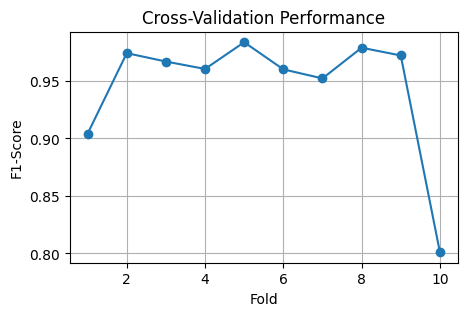

,model,n_estimators,criterion,max_depth,final_f1_score
0,RandomForestClassifier,100,gini,None,1.0


In [ ]:
fraud.cross_validation_report(model = 'rfc', folds = 10, threshold = 0.2)

Fold 1: No sign of overfitting
Fold 2: No sign of overfitting
Fold 3: No sign of overfitting
Fold 4: No sign of overfitting
Fold 5: No sign of overfitting
Fold 6: No sign of overfitting
Fold 7: No sign of overfitting
Fold 8: No sign of overfitting
Fold 9: No sign of overfitting
Fold 10: No sign of overfitting


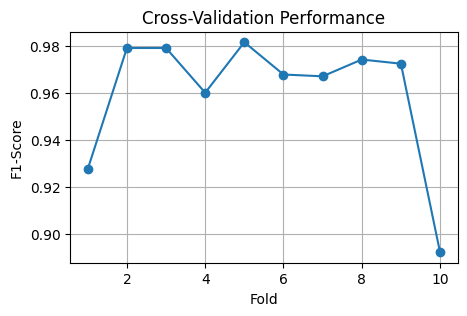

,model,n_estimators,learning_rate,max_depth,final_f1_score
0,GradientBoostingClassifier,100,0.1,3,0.988


In [92]:
fraud.cross_validation_report(model = 'gbc', folds = 10, threshold = 0.2)

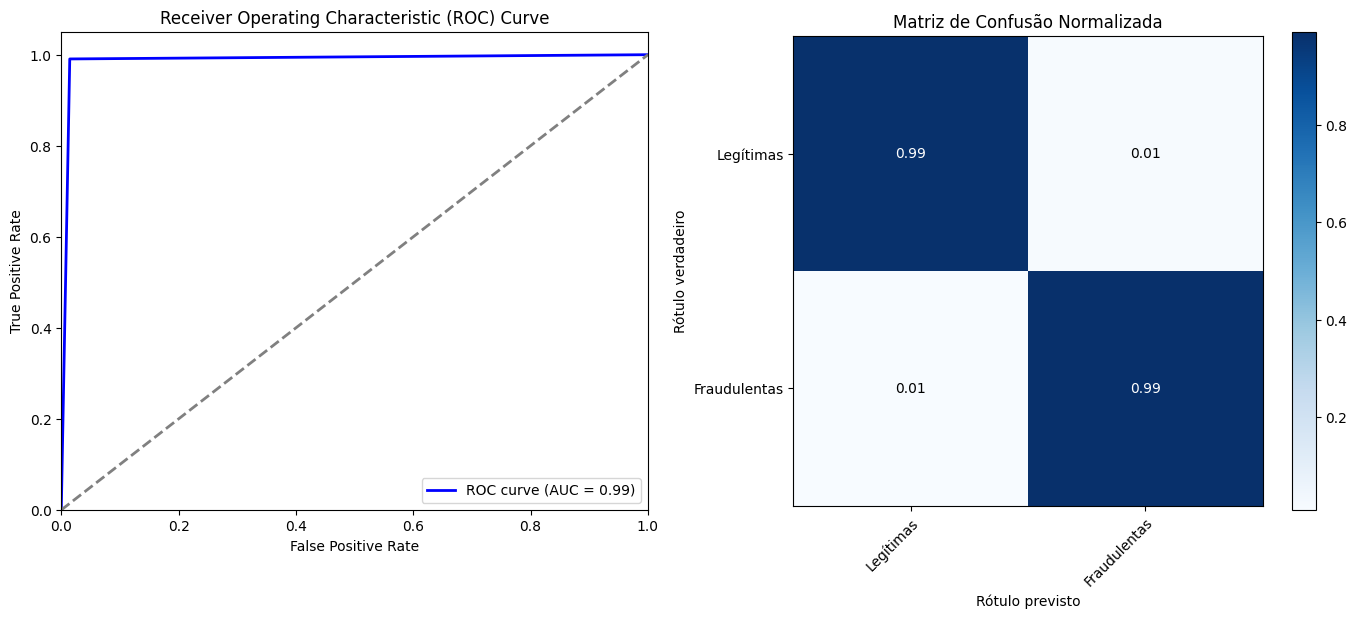

In [94]:
fraud.plot_classification_viz(normalize=True)

In [95]:
# Model Definition
xgb = GradientBoostingClassifier(random_state = 42)
# Cross-Validation
xgb_cv = cross_validate(xgb, X_resampled, y_resampled, scoring='f1', cv= 10, return_train_score = True)
# Overfitting Evaluation
overfitting_eval(xgb_cv['train_score'] , xgb_cv['test_score'], 0.2)
# Model training
xgb.fit(X_resampled, y_resampled)
# Model prediction
y_hat = xgb.predict(X_resampled)
# Model performance
print('F1-score:', f1_score(y_resampled, y_hat))

Fold 1: No sign of overfitting
Fold 2: No sign of overfitting
Fold 3: No sign of overfitting
Fold 4: No sign of overfitting
Fold 5: No sign of overfitting
Fold 6: No sign of overfitting
Fold 7: No sign of overfitting
Fold 8: No sign of overfitting
Fold 9: No sign of overfitting
Fold 10: No sign of overfitting
F1-score: 0.9881422924901185


In [101]:
X_resampled.iloc[np.where(y_resampled == 1)[0]]['amt']

1685        24.84
1767       780.52
1781       620.33
1784      1077.69
1857       842.65
           ...   
517197    1041.51
517274     868.09
517341    1039.42
517529     289.27
517571     766.38
Name: amt, Length: 2145, dtype: float64

In [108]:
X_resampled.iloc[np.where((y_resampled == 1) & (y_hat == 1))[0]]['amt']

1685        24.84
1767       780.52
1781       620.33
1784      1077.69
1857       842.65
           ...   
517197    1041.51
517274     868.09
517341    1039.42
517529     289.27
517571     766.38
Name: amt, Length: 2125, dtype: float64

In [109]:
def financial_impact_report(X_test, y_test, y_hat):
    
    # Calcular matriz de confusão
    cm = confusion_matrix(y_test, y_hat)
    
    # Calcular o número de transações fraudulentas detectadas corretamente e incorretamente
    true_positives = cm[1, 1]
    false_negatives = cm[1, 0]
    
    # Calcular o custo médio das transações fraudulentas com base nos valores reais
    avg_fraud_cost = np.mean(X_test.iloc[np.where(y_test == 1)[0]]['amt'])
    
    # Calcular o benefício médio de detectar corretamente uma transação fraudulenta com base nas previsões do modelo
    avg_detection_benefit = np.mean(X_resampled.iloc[np.where((y_resampled == 1) & (y_hat == 1))[0]]['amt'])
    
    # Calcular o valor total de transações fraudulentas detectadas corretamente (benefício)
    total_detection_benefit = true_positives * avg_detection_benefit
    
    # Calcular o valor total de transações fraudulentas não detectadas (prejuízo)
    total_fraud_loss = false_negatives * avg_fraud_cost
    
    # Calcular economia total em comparação com jogar uma moeda
    total_savings = total_detection_benefit - total_fraud_loss
    
    # Apresentar o relatório
    print("Relatório de Impacto Financeiro do Modelo de Detecção de Fraude:")
    print("---------------------------------------------------------------")
    print(f"Benefício total (transações fraudulentas detectadas corretamente): ${total_detection_benefit:.2f}")
    print(f"Prejuízo total (transações fraudulentas não detectadas): ${total_fraud_loss:.2f}")
    print(f"Economia total em comparação a jogar uma moeda: ${total_savings:.2f}")


In [111]:
financial_impact_report(X_resampled, y_resampled, y_hat)

Relatório de Impacto Financeiro do Modelo de Detecção de Fraude:
---------------------------------------------------------------
Benefício total (transações fraudulentas detectadas corretamente): $1132325.80
Prejuízo total (transações fraudulentas não detectadas): $10567.13
Economia total em comparação a jogar uma moeda: $1121758.67
